# **To determine the condition of patients heart using a collection of test data by analytical approach.**

**About dataset:**
*  Age : Age of the patient
*  Sex : Sex of the patient
*  exang: exercise induced angina (1 = yes; 0 = no)
*  ca: number of major vessels (0-3)
*  cp : Chest Pain type chest pain type

    *Value 1: typical angina*.

    *Value 2: atypical angina.*

    *Value 3: non-anginal pain.*

    *Value 4: asymptomatic.*

* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results

    *Value 0: normal.*

    *Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV).*

    *Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria*.

* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack




**Importing Libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline 

**Reading the dataset:**

In [3]:
path = '/content/drive/MyDrive/heart_data/heart.csv'
df = pd.read_csv(path)
df.head() 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Testing for NULL values:**

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Exploratory Data Analytics:**

Plot 1: Testing whether age is a factor in rising body cholesterol problem

<Axes: xlabel='age', ylabel='chol'>

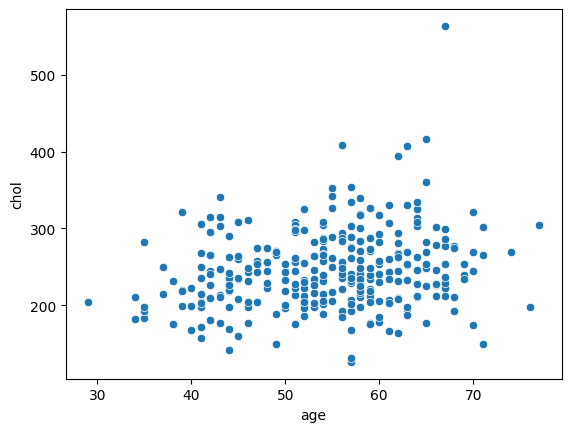

In [5]:
#applying scatter plot
sns.scatterplot(x='age',y='chol',data = df)#chol = cholesterol

Plot 2: Testing whether chestpain is associated with age

<Axes: xlabel='age', ylabel='cp'>

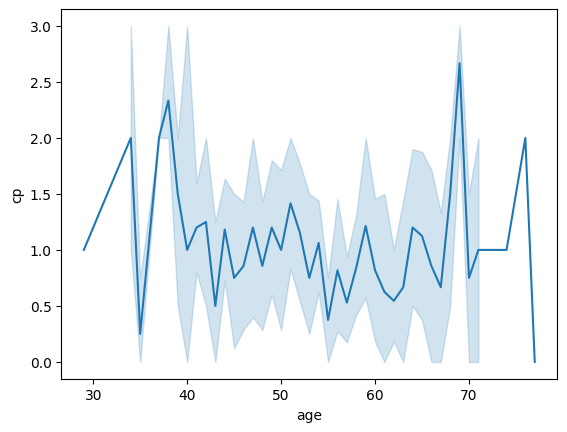

In [6]:
#applying lineplot
sns.lineplot(x='age',y='cp',data = df)#cp = chestpain

Plot 3: Testing the output in association with chestpain
 
 *note: output indicate the rate of heart problem* 

<Axes: xlabel='output', ylabel='cp'>

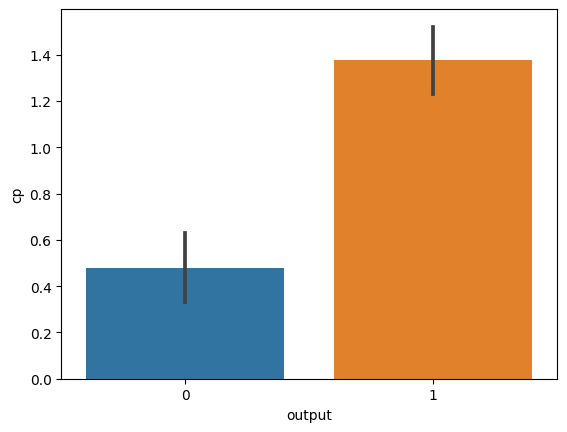

In [7]:
#applying barplot
sns.barplot(x='output',y='cp',data = df)

Plot 4: Testing the output in association with cholesterol

<Axes: xlabel='output', ylabel='chol'>

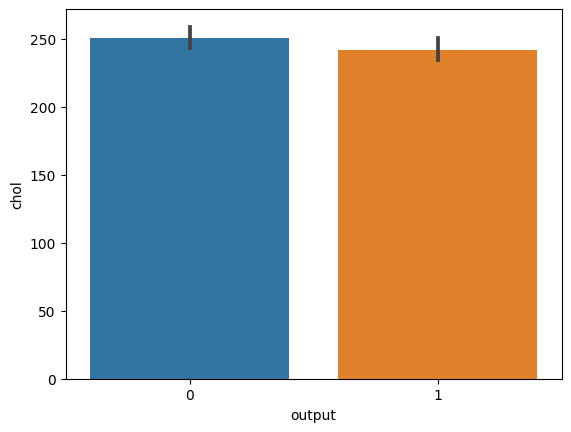

In [8]:
#applying barplot
sns.barplot(x='output',y='chol',data = df)

Plot 5: Testing the blood pressure in association with cholesterol

<Axes: xlabel='trtbps', ylabel='chol'>

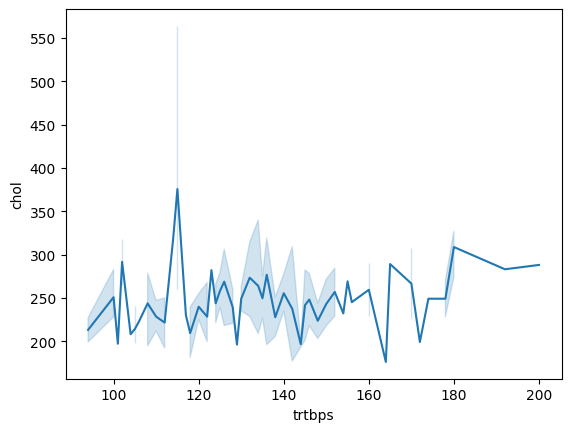

In [9]:
#applying lineplot
sns.lineplot(y='chol',x='trtbps',data = df)#trtbps = resting blood pressure (in mm Hg)

Plot 6: Testing the heart rate in association with cholesterol

<Axes: xlabel='thalachh', ylabel='chol'>

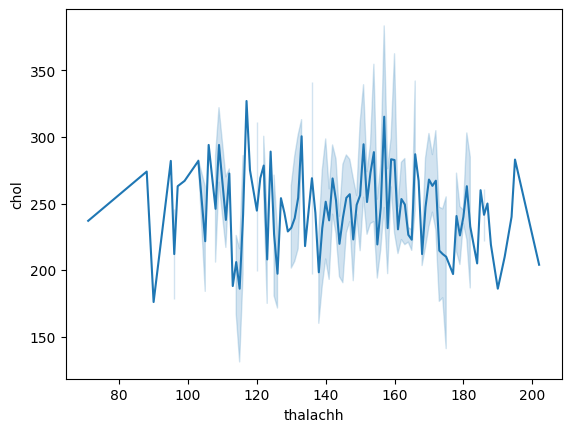

In [11]:
#applying lineplot
sns.lineplot(y='chol',x='thalachh',data = df)#thalachh : maximum heart rate achieved

Plot 8: Testing the heart rate in association with age

<Axes: xlabel='thalachh', ylabel='age'>

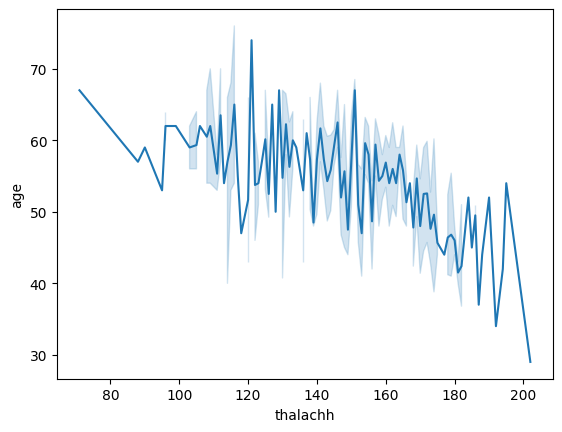

In [12]:
#applying lineplot
sns.lineplot(y='age',x='thalachh',data = df)#thalachh : maximum heart rate achieved

**Model structure:**

Train,Test & Split:

In [13]:
x = df.drop(['output'],axis =1)
y = df['output']

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [15]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

Logistic Regression:

In [16]:
lr = LogisticRegression()


In [17]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [18]:
str(lr.score(xtest,ytest)*100)+' % accuracy'

'88.52459016393442 % accuracy'

In [19]:
yp = lr.predict(xtest)

In [20]:
cfm = confusion_matrix(ytest,yp)
cfm

array([[25,  4],
       [ 3, 29]])

<Axes: >

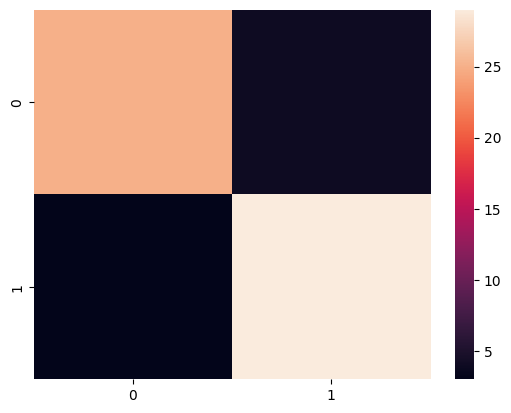

In [21]:
sns.heatmap(cfm)

SVM/Support Vector Classifier:

In [22]:
sv = SVC()

In [23]:
sv.fit(xtrain,ytrain)

SVC()

In [24]:
str(sv.score(xtest,ytest)*100)+' % accuracy'

'86.88524590163934 % accuracy'

Random Forrest:

In [25]:
rfc = RandomForestClassifier(n_estimators = 20000)

In [26]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=20000)

In [27]:
str(rfc.score(xtest,ytest)*100)+' % accuracy'

'86.88524590163934 % accuracy'

In [28]:
rfm = cross_val_score(rfc,X = xtrain, y = ytrain, cv = 10)

In [ ]:
str(rfm.mean()*100)+' % accuracy'

K-Nearest Neighbour:

In [29]:
kn = KNeighborsClassifier(n_neighbors = 5)

In [30]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [31]:
str(kn.score(xtest,ytest)*100)+' % accuracy'

'90.1639344262295 % accuracy'

as the K-Near Neb show the higest accuracy we will be using it.

In [32]:
df.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [33]:
pd = [[20,0,0,80,58,1,0,72,0,1,1,0,0]]#data_order = [age,sex,chestPain,resting blood pressure,cholesterol,fasting blood suger, 
#ecg , heart rate, exercise induced angina,peak of ecg, slope, Number of major vessels, Thalium Stress Test result ~ (0,3),]
kn.predict(pd)


array([0])